In [1]:
from pathlib import Path

import pandas as pd

outputs_dir = Path('../data/outputs')

In [107]:
plot_summaries = pd.read_csv(outputs_dir / "plot_summary_metrics.csv")
plot_summaries = plot_summaries.set_index('id')
plot_summaries = plot_summaries.drop(columns=['mean__point_density', 'mean__pulse_density', 'mean__scan_angle_mean'])
plot_summaries

,mean__chm,mean__veg_height_mean,mean__veg_height_median,mean__crr,mean__veg_height_q10,mean__veg_height_q20,mean__veg_height_q30,mean__veg_height_q40,mean__veg_height_q50,mean__veg_height_q60,...,cv__vci,cv__shann_capture,mean__groundstorey_capture,sd__groundstorey_capture,mean__understorey_capture,sd__understorey_capture,mean__midstorey_capture,sd__midstorey_capture,mean__upperstorey_capture,sd__upperstorey_capture
id,,,,,,,,,,,,,,,,,,,,,
AGG_O_01_P1,9.104318,5.137496,5.942358,0.555466,0.827366,2.094856,3.608292,4.965329,5.942358,6.597463,...,0.261268,0.255332,0.471075,0.290380,0.158089,0.144361,0.000000,0.000000,0.480691,0.215257
AGG_O_01_P2,9.143720,5.406901,6.223384,0.587945,1.139656,2.580198,4.114914,5.355371,6.223384,6.835356,...,0.288134,0.289123,0.400177,0.291431,0.169626,0.152461,0.000000,0.000000,0.490357,0.223808
AGG_O_01_P3,10.808279,6.217011,7.103875,0.566187,1.219969,2.737667,4.482414,5.977429,7.103875,7.919472,...,0.220487,0.214130,0.467292,0.304812,0.210440,0.212543,0.000000,0.000000,0.530290,0.196480
AGG_O_01_P4,26.233368,13.597761,14.183244,0.515107,2.973598,5.638570,8.552811,11.551565,14.183244,16.632432,...,0.280738,0.268641,0.621307,0.313052,0.616142,0.280960,0.292383,0.294543,0.161525,0.255513
AGG_O_01_P5,33.688303,18.889891,19.677525,0.559599,6.047861,9.974202,13.305916,16.630211,19.677525,22.616586,...,0.222607,0.215960,0.467454,0.322066,0.550520,0.295910,0.467776,0.308262,0.200391,0.277582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ULY_Y_96_P1,8.352560,4.404127,4.335475,0.509003,1.691274,2.384248,3.008736,3.701808,4.335475,4.996061,...,0.475823,0.422799,0.625370,0.340075,0.194369,0.237336,0.405743,0.362190,0.010009,0.055076
ULY_Y_96_P2,6.701582,3.035757,2.953558,0.460762,0.612857,1.049896,1.630950,2.234692,2.953558,3.576641,...,0.620853,0.516626,0.750312,0.270573,0.192010,0.244394,0.193823,0.263624,0.035624,0.123886
ULY_Y_96_P3,4.673009,1.822269,1.539182,0.441329,0.488729,0.675738,0.897068,1.172479,1.539182,1.944506,...,0.537031,0.450058,0.793417,0.264498,0.281321,0.261548,0.145523,0.207318,0.006595,0.046898


In [204]:
# Import libraries for correlation analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform, pdist
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [240]:
# Use spearman cos handles nonlinear relationships and outliers
corr_matrix = plot_summaries.corr(method='pearson')

# Distance matrix is 1 - absolute correlation
distance_matrix = 1 - corr_matrix.abs()

# Condense the matrix into 1D
condensed_distances = squareform(distance_matrix)

# Perform hierarchical clustering using Ward method
linkage_matrix = hierarchy.linkage(condensed_distances, method='complete')

distance_threshold = 0.3
clusters = hierarchy.fcluster(linkage_matrix, distance_threshold, criterion='distance')
cluster_df = pd.DataFrame({
    'metric': plot_summaries.columns,
    'cluster': clusters
}).sort_values('cluster')
cluster_df

,metric,cluster
14,mean__veg_height_cv,1
48,cv__veg_height_q10,1
49,cv__veg_height_q20,1
17,mean__veg_height_gini,1
47,cv__veg_height_median,2
...,...,...
26,sd__crr,18
40,sd__veg_height_gini,18
39,sd__veg_height_kurt,19
38,sd__veg_height_skew,19


In [246]:
corr_matrix.index.name = 'metric'
corr_matrix.to_csv(outputs_dir / "metric_correlation.csv", index=True)

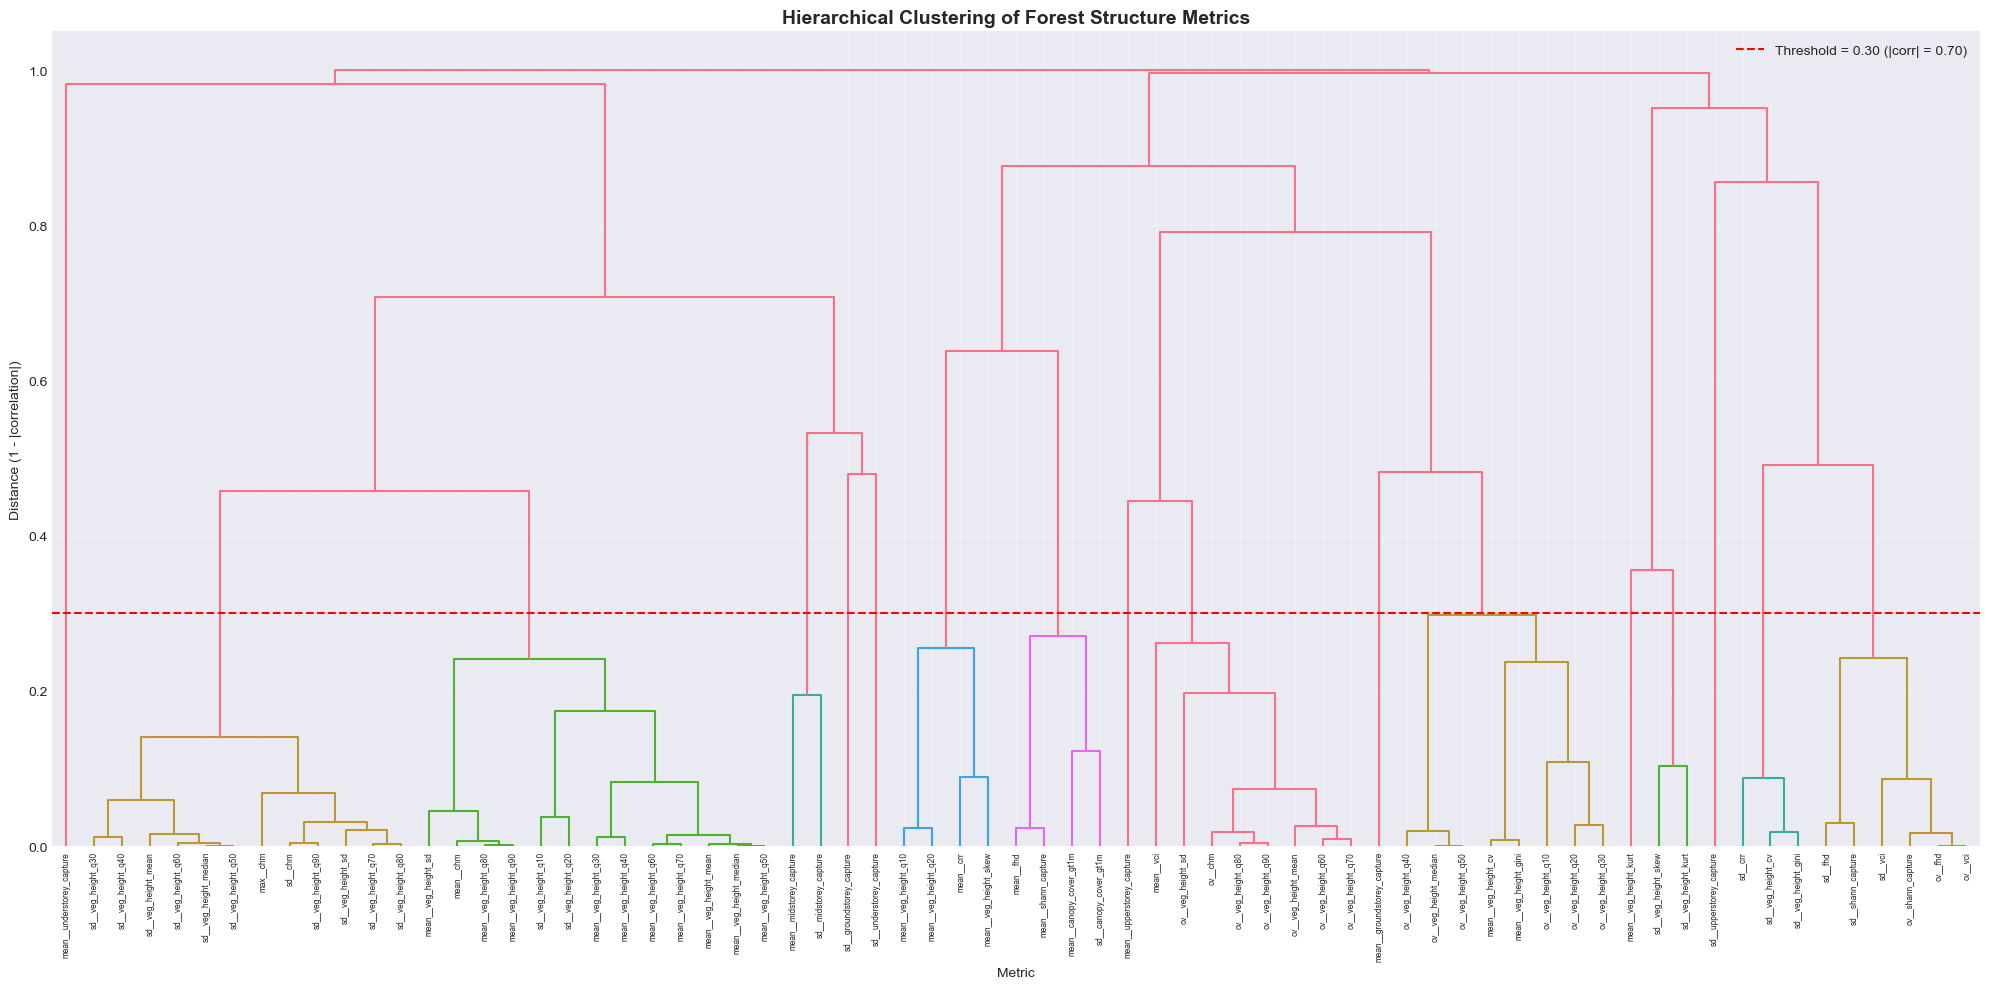

In [236]:
# Create dendrogram with color threshold
fig, ax = plt.subplots(figsize=(20, 10))


# Create dendrogram
dendrogram = hierarchy.dendrogram(
    linkage_matrix,
    labels=plot_summaries.columns,
    ax=ax,
    leaf_rotation=90,
    leaf_font_size=6,
    color_threshold=distance_threshold
)

ax.set_title('Hierarchical Clustering of Forest Structure Metrics', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Metric', fontsize=10)
ax.set_ylabel('Distance (1 - |correlation|)', fontsize=10)
ax.axhline(y=distance_threshold, c='red', linestyle='--', linewidth=1.5, 
           label=f'Threshold = {distance_threshold:.2f} (|corr| = {1-distance_threshold:.2f})')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

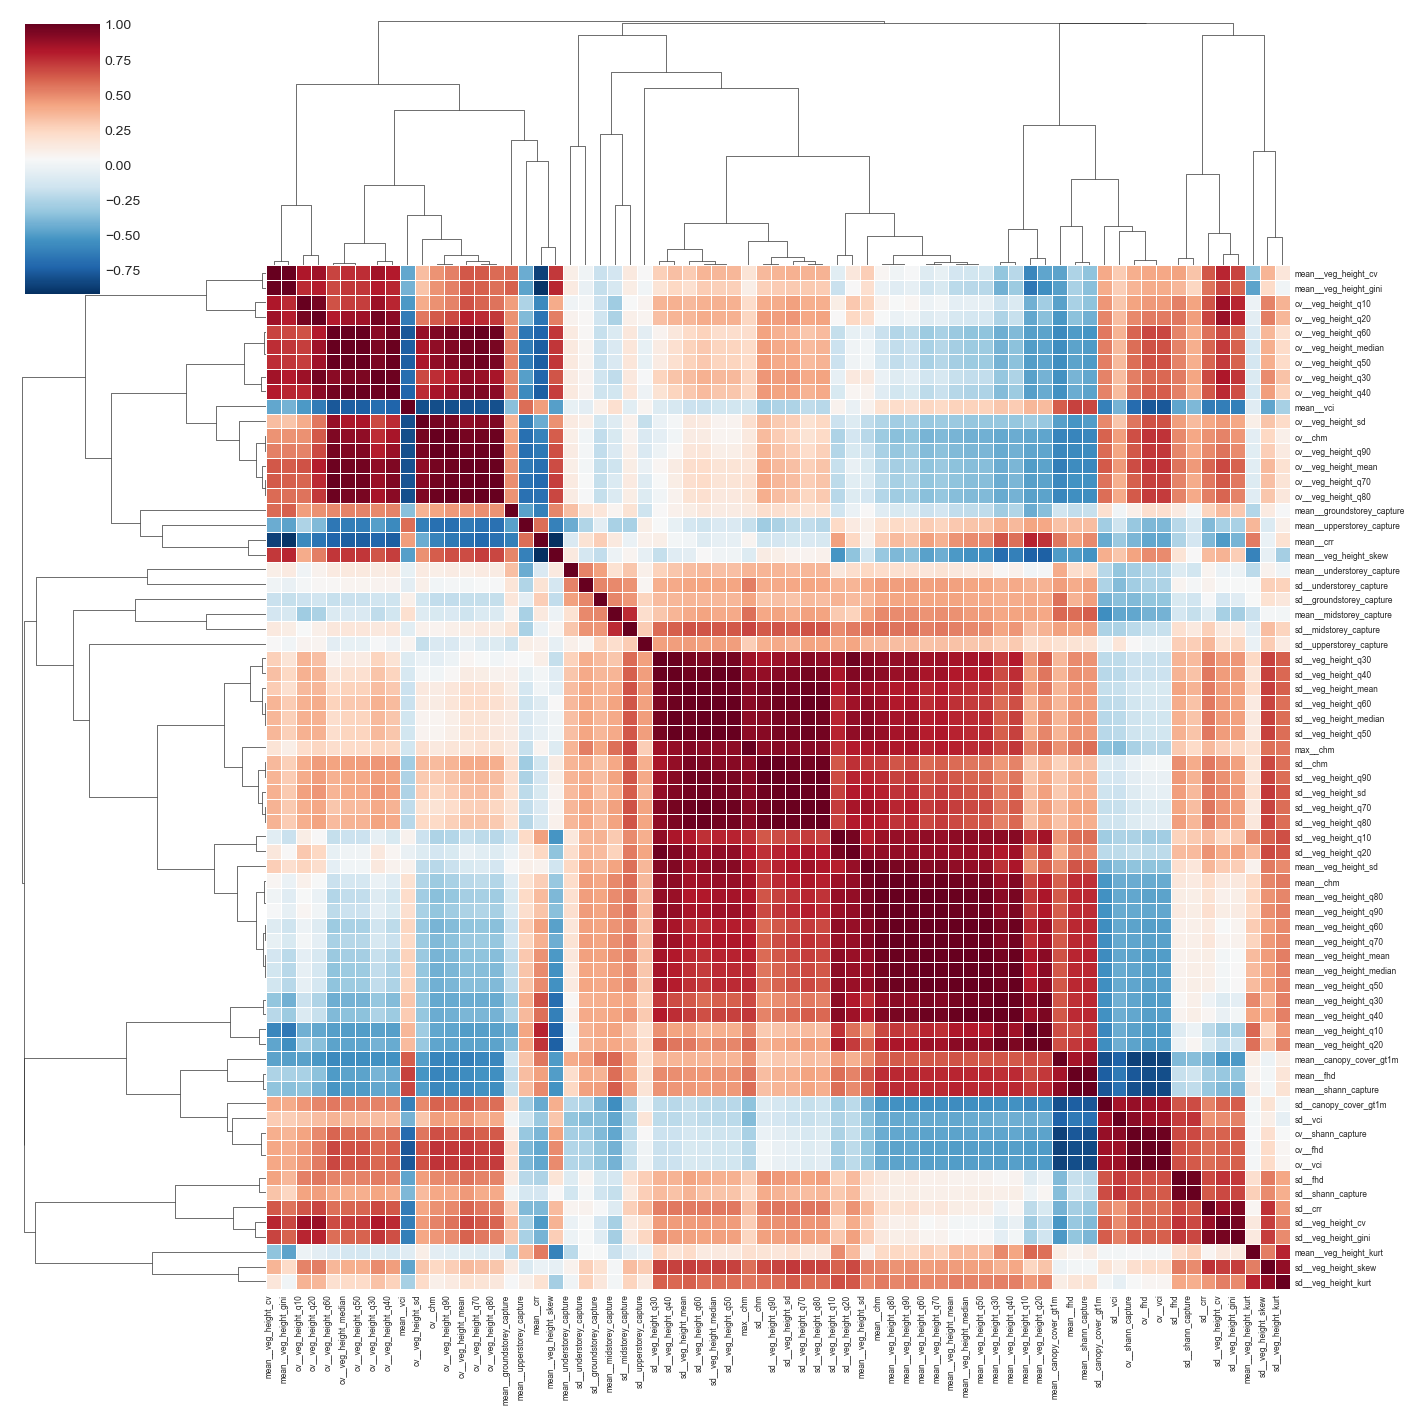

In [233]:
# Create clustermap with smaller font sizes for better readability
g = sns.clustermap(corr_matrix, 
                   cmap='RdBu_r', 
                   linewidths=0.5, 
                   figsize=(15, 15), 
                   row_linkage=linkage_matrix, 
                   col_linkage=linkage_matrix,
                   xticklabels=True,
                   yticklabels=True)

# Adjust font sizes for the tick labels
g.ax_heatmap.tick_params(axis='x', labelsize=6)
g.ax_heatmap.tick_params(axis='y', labelsize=6)

# Rotate x-axis labels for better readability
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, ha='right')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()
